In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Default of Credit Card Clients Data Set 


# 1. Introduction

## 1.1 Project Motivation/Background

Credit cards have been viewed as a competitive banking product which helps to improve a bank’s financial position. Credit card had a $28.84 trillion global market in 2014 (lsmail, 2014). For the convenience of citizens abroad traveling, credit cards were first issued in Taiwan in 1973. In year 2000, electronic payment on the internet have been established, which lead to a rapid expansion of credit card market (Lee, 2011).   
Credit card payment becomes one of the most common and popular payment method for online purchasing. Financial corporations process payments between store and card banks, enabling millions of users around the world to make purchases with branded credit cards. In year 2005, there are forty-nine credit card banks located in Taiwan, and the number of credit cards issued had reached 45 million (Lee, 2011).   
The size of credit card market has given consumers more opportunities for making purchasing. Credit card holders from different age groups, different education level, and different gender have different usage behaviors. It is meaningful for banks and financial institutions to investigating the credit card default issue and predicting the default of all clients in various condition.   
In this paper, we explored the factors influencing the defaults of credit card clients, tried to determine how much each factor contribute to the default of credit card, and proposed a model for predicting default of credit card clients. 

## 1.2 Data Set Information:  

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Method to estimate the real probability of default.   

With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.

### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:  
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.  
X2: Gender (1 = male; 2 = female).  
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).  
X4: Marital status (1 = married; 2 = single; 3 = others).  
X5: Age (year).  
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:   
X6 = the repayment status in September, 2005;    
X7 = the repayment status in August, 2005; . . .;  
X11 = the repayment status in April, 2005.   
The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.  
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.  
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [0]:
data = pd.read_csv('credit_default.csv') # relative directory

In [0]:
# make a copy of the dataset for EDA
data1 = data.copy()

In [0]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [0]:
print('shape of the dataset: {}'.format(data1.shape))

shape of the dataset: (30000, 25)


# 2. Exploratory Data Analysis

## 2.1 Data Information

In [0]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [0]:
data1['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [0]:
data1['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [0]:
data1['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [0]:
data1['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [0]:
data1['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [0]:
data['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [0]:
data1['PAY_3'].value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

In [0]:
data1['PAY_4'].value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64

In [0]:
data1['PAY_5'].value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

 In EDUCATION variable, we discover unexpected values 5,6, and 0, when the data description only provides value 1,2,3 and 4. In MARRIAGE variable, an unexpected variable 0 takes place. Also in PAY_n variables, we have unexpected values -2, and 0.  
 For EDUCATION, we decide to combine 5,6,0 values into 4, which stands for 'others'. The same way we deal with MARRIAGE, which is to combine 0 into 3.   
 However for PAY_n, we need to take a closer look at what value -2 and 0 stand for.

## 2.2 Graph

<Figure size 1080x576 with 0 Axes>

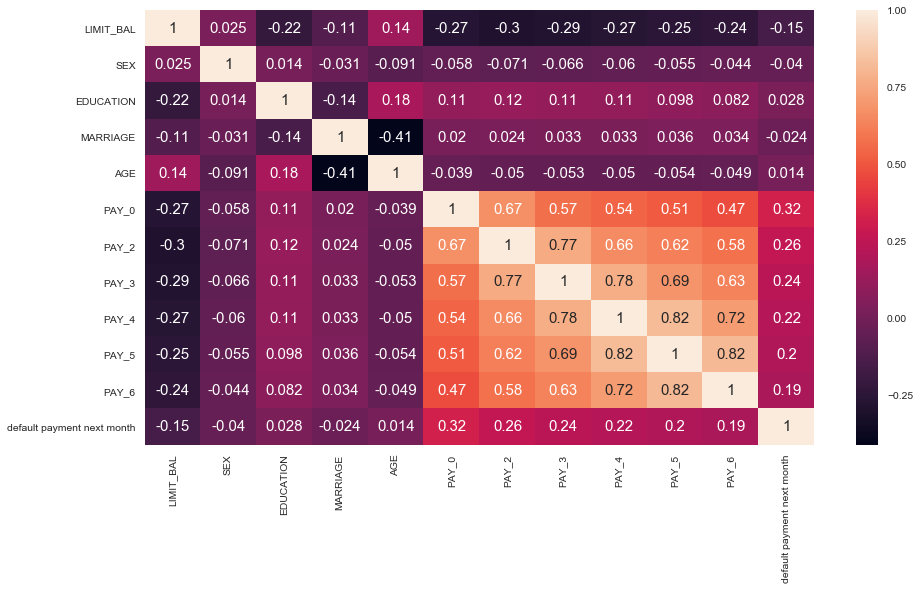

In [0]:
corrdata=data1[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default payment next month']]
corr = corrdata.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, annot_kws={"size": 15})

After plotting the correlation chart for all variables, we found that LIMIT_BAL, SEX, EDU, AGE and MARRIAGE are not highly correlated to each. PAY_0, PAY_2, PAY_3, PAY-4, PAY_5, PAY_6 are correlated much higher degree than other variables. In this way, we can have a brief thought is that those people who can pay the bill on time will highly possbile to pay next bill one time. The probability of their late payment is mianly based on their previous behaviors instead of their characterics.


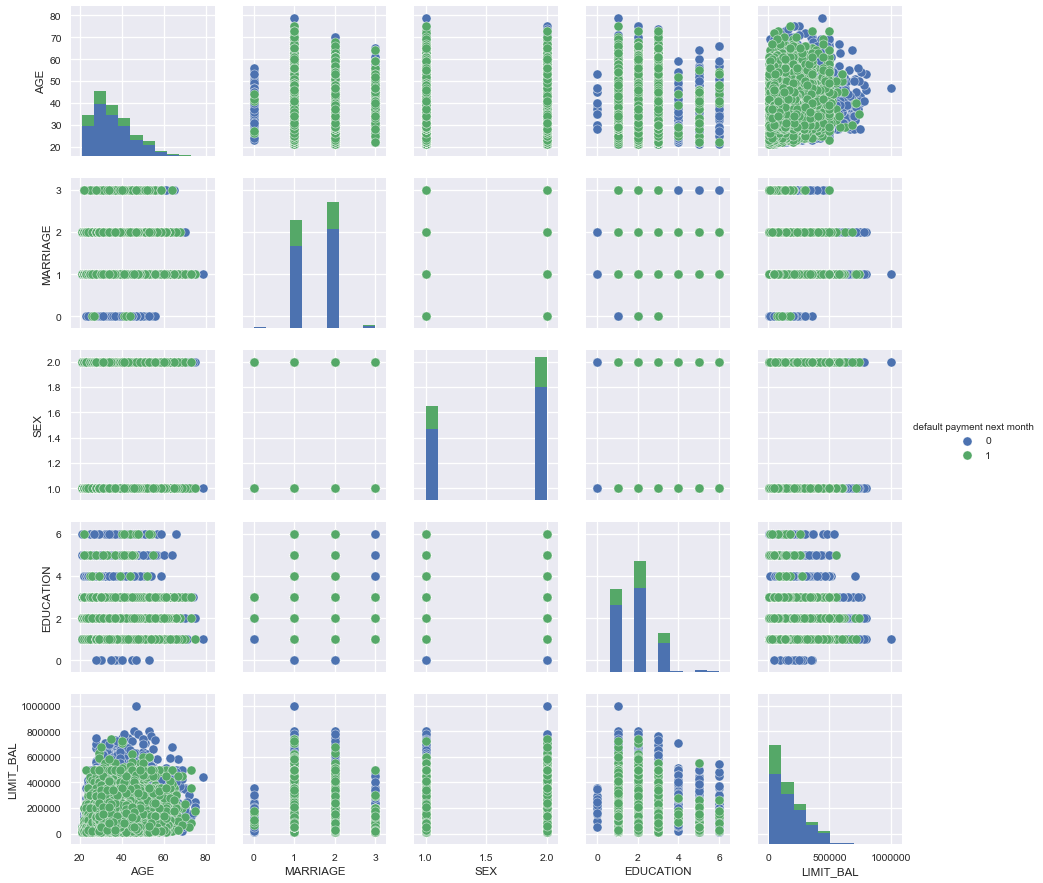

In [0]:
sns.pairplot(data1, hue = 'default payment next month', vars = ['AGE', 'MARRIAGE', 'SEX', 'EDUCATION', 'LIMIT_BAL'] )

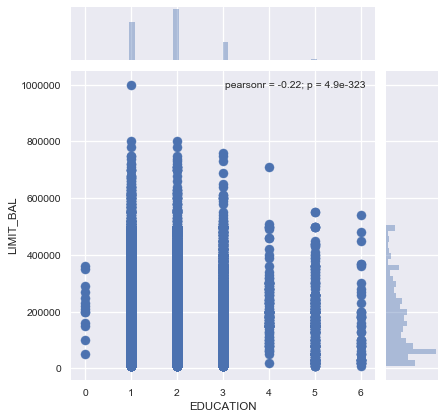

In [0]:
sns.jointplot(x='EDUCATION',y='LIMIT_BAL', data = data1)

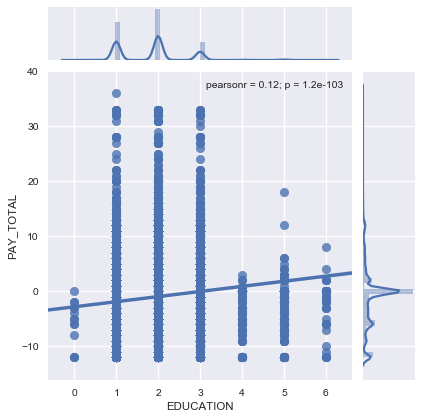

In [0]:
sns.jointplot('EDUCATION', 'PAY_TOTAL', data1, kind = 'regid')

In two chart above, we can find that the higher education level, the higher LIMIT_BAL and PAY_TOTAL, meaning that clients with higher education level will have lower probability to have late payments


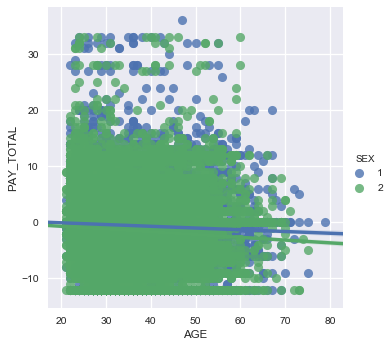

In [0]:
data1['PAY_TOTAL'] = (data1.PAY_0 + data1.PAY_2 + data1.PAY_3 + data1.PAY_4 + data1.PAY_5 + data1.PAY_6)
data1['RISK_CAT'] = pd.cut(data1.PAY_TOTAL, [-20,-10,0,10], labels=["low","medium","high"])
data1['AGE_GROUP'] = pd.cut(data1.AGE, [21,40,60,81], labels=["young","middle","senior"])
sns.lmplot(x='AGE', y='PAY_TOTAL', data=data1, hue ='SEX')

In this plot chart, we tries to present the corrleation of AGE and PAY-TOTAL by comparing different sex. Based on the trend line we have, as AGE going up, Men have higher value  for the PAY_TOTAL than Weman. For both gender, as age increases, the value of PAY_TOTAL descrases a little bit might be caused by more stable per

<Figure size 1080x576 with 0 Axes>

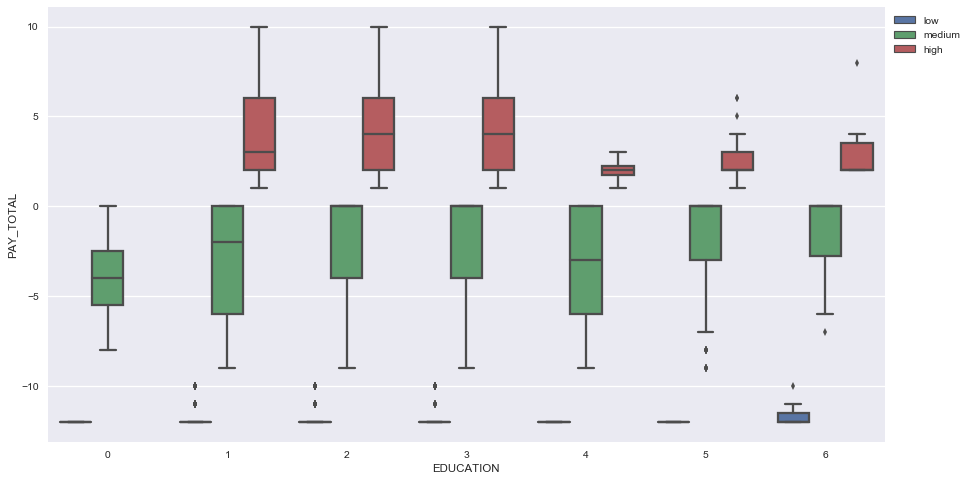

In [0]:
plt.figure(figsize=(15,8))
sns.boxplot(x= 'EDUCATION', y = 'PAY_TOTAL',data=data1, hue = 'RISK_CAT')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

We have divided pay_total into three different groups, low, medium and high. Here low risk includes those whose pay_total is under -10, and medium refers to those between -10 and 0, and the rest belong to the high risk, which means those customers haven’t paid the credit card bill for quite a long time. As mentioned before, the smaller number means a higher education level. From this box plot, it is obvious that most high risk is concentrated among high education levels, from high school to graduate. And medium risk is distributed more uniformly among all education levels.

<Figure size 1080x576 with 0 Axes>

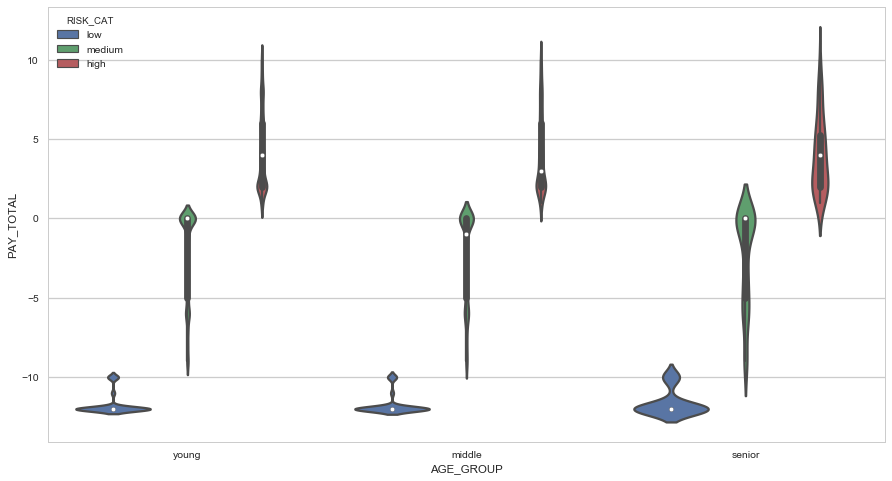

In [0]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.violinplot('AGE_GROUP', 'PAY_TOTAL', data = data1, hue = 'RISK_CAT')

Since age has a wide range, we grouped them into young, middle and senior. Where young represents those who are above 21 but under 40, middle is among 40 to 60 and senior is over 60 to 81. From this plot, we can see no matter risk it is, senior group always has the largest size, which means people over 60 would have a higher risk of credit card default compared with younger people.

<Figure size 1080x720 with 0 Axes>

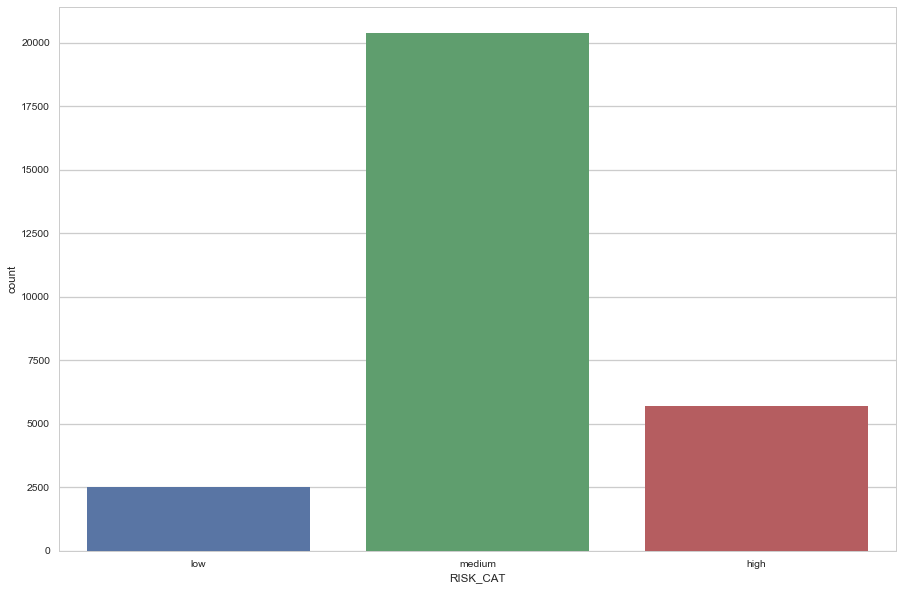

In [0]:
plt.figure(figsize = (15,10))
sns.countplot(x='RISK_CAT', data=data1)

This chart shows the distribution of risk among the entire dataset. Low risk has the least customers while middle risk has the most. And here middle risk is over 8 times the size of low risk and about 4 times of high risk. It is not so bad because although low risk is the least, middle risk still covers the most.

[Text(0,0,'No Consumption'),
 Text(0,0,'Paid in Full'),
 Text(0,0,'Use Revolving Credit'),
 Text(0,0,'Delay 1 mth'),
 Text(0,0,'Delay 2 mths'),
 Text(0,0,'Delay 3 mths'),
 Text(0,0,'Delay 4 mths'),
 Text(0,0,'Delay 5 mths'),
 Text(0,0,'Delay 6 mths'),
 Text(0,0,'Delay 7 mths'),
 Text(0,0,'Delay 8 mths')]

Text(0.5,1,'Credit Behaviour (most recent month)')

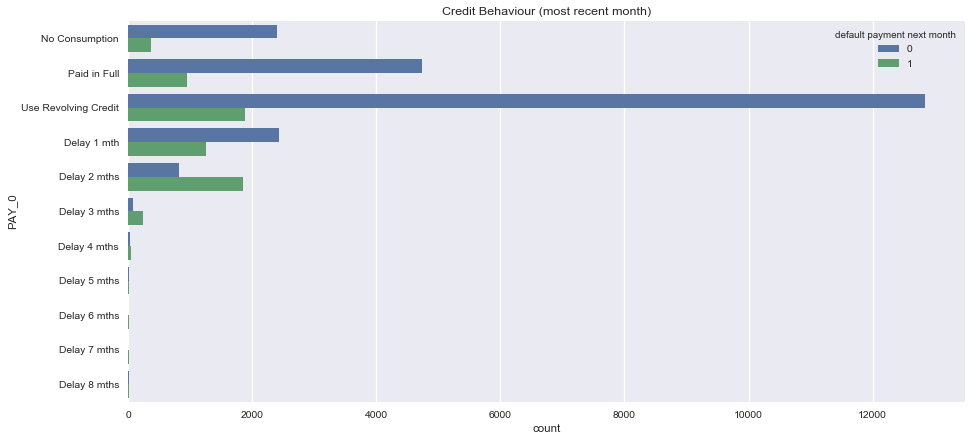

In [0]:
sns.set(rc={'figure.figsize':(15,7)})
sns.set_context("talk", font_scale=0.8)

pay1 = sns.countplot( y="PAY_0", hue='default payment next month', data=data1)
pay1.set_yticklabels(['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths'])
pay1.set_title('Credit Behaviour (most recent month)')

This graph shows the relationship between default and credit behaviors. For those who have no consumption, paid in full every month and delay 1 month, the number of no default is more than that of default. For those who use revolving credit, which means people who only pay the minimum every month, the non-default far exceeds the default. However, for those who delay the payment for more than one month, it turns out that the likelihood of default would then surpass the non-default, which also means the longer the payment delay, the higher risk for that person on default.

# 3. Data Cleaning and Pre-processing

In this section we will deal with these aspects:
- Missing values  
- Categorical Variables:
  - Ordinal variables: EDUCATION, PAY_n
  - Norminal variables : MARRIAGE, SEX
- Train-test split
- Resampling


## 3.1 Checking Missing Values

In [0]:
# use a copy of the original dataset for cleaning and modeling
credit.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## 3.2 Categorical Varaibles: 

### 3.2.1 Ordinal variables: EDUCATION, PAY_n

We consider EDUCATION and PAY_n as ordinal variables, which means the value has a clear ordering.   
In EDUCATION variable, we discover some unexpected values 5,6, and 0, when the data description only provides value 1,2,3 and 4. We decide to combine 5,6,0 all into 4, which stands for 'other'.  
Also in PAY_n variables, we have unexpected values -2, and 0.

In [0]:
data['EDUCATION']= data['EDUCATION'].apply(lambda x:4 if x in [5,6,0] else x)

In [0]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [0]:
#PAY_n
data[['PAY_0','BILL_AMT1','PAY_AMT1']][(data['PAY_0']==0) | (data['PAY_0'] ==-1)|(data['PAY_0'] ==-2)]

,PAY_0,BILL_AMT1,PAY_AMT1
1,-1,2682,0
2,0,29239,1518
3,0,46990,2000
4,-1,8617,2000
5,0,64400,2500
6,0,367965,55000
7,0,11876,380
8,0,11285,3329
9,-2,0,0
10,0,11073,2306


## 3.2.2 Norminal Variables: MARRIAGE and SEX

We identify MARRIAGE and SEX as norminal variables, which means there is no intrinsic ordering to the categories.  
SEX has onley 2 categories: 1 for male and 2 for female. We can keep its original format.  
MARRIAGE should have 3 values according to data description. However, an unexpected variable 0 takes place. We decided to merge value 0 into value 3, which stands for 'other'.
We then apply one-hot encoding to create dummy variables for MARRIAGE.

In [0]:
data['MARRIAGE'] = data['MARRIAGE'].apply(lambda x:3 if x==0 else x )

In [0]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [0]:
marriage=pd.get_dummies(data['MARRIAGE'],columns='MARRIAGE',prefix='MARRIAGE')
marriage.head()

,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [0]:
datanew1 = pd.concat([data.iloc[:,0:3],marriage],axis = 1)
datanew = pd.concat([datanew1,data.iloc[:,4:24]],axis = 1)
datanew.shape

(30000, 26)

In [0]:
datanew.head().T

,0,1,2,3,4
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE_1,1,0,0,1,1
MARRIAGE_2,0,1,1,0,0
MARRIAGE_3,0,0,0,0,0
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1


## 3.3 Rename Target Column and Drop id

In [0]:
data.rename(columns ={'default payment next month': 'Default'}, inplace = True)
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,PAY_TOTAL,RISK_CAT,AGE_GROUP
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,-2,medium,young
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,3,high,young
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0,medium,young
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0,medium,young
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,-2,medium,middle


In [0]:
data.drop(columns = 'ID', axis = 1, inplace = True)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,PAY_TOTAL,RISK_CAT,AGE_GROUP
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,689,0,0,0,0,1,-2,medium,young
1,120000,2,2,2,26,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,1,3,high,young
2,90000,2,2,2,34,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0,medium,young
3,50000,2,2,1,37,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0,medium,young
4,50000,1,2,1,57,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,0,-2,medium,middle


## 3.4 Train Test Split

We then split the orignial dataset into train and test data for model training.

In [0]:
X = datanew
y = datanew.iloc[:,25]
from sklearn.model_selection import train_test_split  
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [0]:
X_train = X_train_org.copy()
X_test = X_test_org.copy()

X_train.drop(columns = 'Default', axis = 1, inplace = True)
X_test.drop(columns = 'Default', axis = 1, inplace = True)

X_train.columns
X_test.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

## 3.5 Resampling

In EDA, we discovers that this is a very imbalanced dataset, that default = 1 values only counts for 22% of the whole dataset. Thus, it doesn't have enough data for models to identify features for default = 1 values.  
we need to apply resampling methods to increase the percent of default =1 values in order to ahcieve better model training results. 

In [0]:
train_majority = X_train_org[X_train_org['Default'] ==0]
train_minority = X_train_org[X_train_org['Default'] ==1]

train_majority.shape
train_minority.shape

(5339, 26)

### 3.5.1 Up-Sampling

By using Up-sampling method, we randomly increase the amount of minority labels(default = 1) to match the amount of majority labels(default = 0).  
After up-sampling, the amount of both categories would equal to 18661.

In [0]:
# upsampling - increase the amount of minority labels to match majority
from sklearn.utils import resample
train_min_upsampled = resample(train_minority, replace =True, n_samples = 18661, random_state = 42)
train_upsampled = pd.concat([train_min_upsampled, train_majority]).sample(frac =1,random_state = 3)

train_upsampled.Default.value_counts()

1    18661
0    18661
Name: Default, dtype: int64

In [0]:
# upsampled dataset
train_upsampled.shape
train_upsampled.columns

X_train_up =train_upsampled.iloc[:,0:25]
y_train_up = train_upsampled.iloc[:,25]

X_train_up.shape
y_train_up.shape

(37322, 26)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

(37322, 25)

(37322,)

### 3.5.2 Down-Sampling

By using Down-sampling method, we randomly decrease the amount of majority labels(default = 0) to match the amount of minority labels(default = 1).  
After down-sampling, the amount of both categories would equal to 5339.

In [0]:
# downsampling - decrease the amount of majority labels to match minority
train_maj_downsampled = resample(train_majority, replace =True, n_samples = 5339, random_state = 27)
train_downsampled = pd.concat([train_maj_downsampled, train_minority]).sample(frac =1,random_state = 6)

train_downsampled.Default.value_counts()

1    5339
0    5339
Name: Default, dtype: int64

In [0]:
# downsampled dataset
train_downsampled.shape
train_downsampled.columns

X_train_down =train_downsampled.iloc[:,0:25]
y_train_down = train_downsampled.iloc[:,25]

X_train_down.shape
y_train_down.shape

(10678, 26)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

(10678, 25)

(10678,)

Now we have 3 set of training dataset :   
- original train dataset - X_train,   
- upsampled train dataset - X_train_up,   
- downsampled train dataset - X_train_down  
We will use all the 3 data training dataset to train models and evaluate the results.

# 4. Predictive Analysis

Models used for making prediction:



*   Logistic Regression
*   Support Vector Machine
*   Decision Tree
*   Random Forest
*   KNN
*   Gradient Boosting Tree

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV

## 4.1 Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logis= LogisticRegression()
grid_param={'penalty':['l1','l2'],
             'C':[0.01, 0.1, 1, 10, 100]}
logis_grid = GridSearchCV(logis, grid_param, cv = 5, n_jobs = -1)

### original dataset

In [0]:
# original training dataset
logis_grid.fit(X_train, y_train)
print('Best Parameters- original', logis_grid.best_params_)
pred_train = logis_grid.predict(X_train)
pred_test = logis_grid.predict(X_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best Parameters- original {'C': 1, 'penalty': 'l1'}


In [0]:
# results - original training dataset
logis_org_train_accuracy = accuracy_score(y_train, pred_train)
logis_org_test_accuracy = accuracy_score(y_test, pred_test)
logis_org_train_recall = recall_score(y_train, pred_train)
logis_org_test_recall = recall_score(y_test, pred_test)
logis_org_train_precision = precision_score(y_train,pred_train)
logis_org_test_precision = precision_score(y_test,pred_test)
logis_org_train_confusion_matrix = confusion_matrix(y_train, pred_train)
logis_org_test_confusion_matrix = confusion_matrix(y_test, pred_test)

print('best score - original', logis_grid.best_score_)
print('train accuracy: ', logis_org_train_accuracy)
print('test accuracy: ', logis_org_test_accuracy)
print('train recall', logis_org_train_recall)
print('test recall: ', logis_org_test_recall)
print('train precision: ', logis_org_train_precision)
print('test precision: ', logis_org_test_precision)
print('train confusion matrix: ', logis_org_train_confusion_matrix)
print('test confusion matrix: ', logis_org_test_confusion_matrix)

best score - original 0.8076666666666666
train accuracy:  0.8080416666666667
test accuracy:  0.8185
train recall 0.23450084285446712
test recall:  0.23670007710100233
train precision:  0.7065462753950339
test precision:  0.7561576354679803
train confusion matrix:  [[18141   520]
 [ 4087  1252]]
test confusion matrix:  [[4604   99]
 [ 990  307]]


### up-sampled dataset

In [0]:
# upsampled dataset
logis_grid.fit(X_train_up, y_train_up)
print('Best Parameters- upsampled', logis_grid.best_params_)
pred_train_up = logis_grid.predict(X_train_up)
pred_test_up = logis_grid.predict(X_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best Parameters- upsampled {'C': 0.01, 'penalty': 'l1'}


In [0]:
#results - upsampled training dataset
logis_up_train_accuracy = accuracy_score(y_train_up, pred_train_up)
logis_up_test_accuracy = accuracy_score(y_test, pred_test_up)
logis_up_train_recall = recall_score(y_train_up, pred_train_up)
logis_up_test_recall = recall_score(y_test, pred_test_up)
logis_up_train_precision = precision_score(y_train_up,pred_train_up)
logis_up_test_precision = precision_score(y_test,pred_test_up)
logis_up_train_confusion_matrix = confusion_matrix(y_train_up, pred_train_up)
logis_up_test_confusion_matrix = confusion_matrix(y_test, pred_test_up)

print('best score - original', logis_grid.best_score_)
print('train accuracy: ', logis_up_train_accuracy)
print('test accuracy: ', logis_up_test_accuracy)
print('train recall', logis_up_train_recall)
print('test recall: ', logis_up_test_recall)
print('train precision: ', logis_up_train_precision)
print('test precision: ', logis_up_test_precision)
print('train confusion matrix: ', logis_up_train_confusion_matrix)
print('test confusion matrix: ', logis_up_test_confusion_matrix)

best score - original 0.6692299448046728
train accuracy:  0.670382080274369
test accuracy:  0.6866666666666666
train recall 0.6396763303145597
test recall:  0.6399383191981496
train precision:  0.681530117042535
test precision:  0.3700401248328132
train confusion matrix:  [[13083  5578]
 [ 6724 11937]]
test confusion matrix:  [[3290 1413]
 [ 467  830]]


### down-sampled dataset

In [0]:
# downsampled dataset
logis_grid.fit(X_train_down, y_train_down)
print('Best Parameters- upsampled', logis_grid.best_params_)
pred_train_down = logis_grid.predict(X_train_down)
pred_test_down = logis_grid.predict(X_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best Parameters- upsampled {'C': 0.1, 'penalty': 'l1'}


In [0]:
# results - downsampled training dataset
logis_down_train_accuracy = accuracy_score(y_train_down, pred_train_down)
logis_down_test_accuracy = accuracy_score(y_test, pred_test_down)
logis_down_train_recall = recall_score(y_train_down, pred_train_down)
logis_down_test_recall = recall_score(y_test, pred_test_down)
logis_down_train_precision = precision_score(y_train_down,pred_train_down)
logis_down_test_precision = precision_score(y_test,pred_test_down)
logis_down_train_confusion_matrix = confusion_matrix(y_train_down, pred_train_down)
logis_down_test_confusion_matrix = confusion_matrix(y_test, pred_test_down)

print('best score - original', logis_grid.best_score_)
print('train accuracy: ', logis_down_train_accuracy)
print('test accuracy: ', logis_down_test_accuracy)
print('train recall', logis_down_train_recall)
print('test recall: ', logis_down_test_recall)
print('train precision: ', logis_down_train_precision)
print('test precision: ', logis_down_test_precision)
print('train confusion matrix: ', logis_down_train_confusion_matrix)
print('test confusion matrix: ', logis_down_test_confusion_matrix)

best score - original 0.6744708746956359
train accuracy:  0.6758756321408503
test accuracy:  0.6873333333333334
train recall 0.6409439970031842
test recall:  0.6353122590593677
train precision:  0.6890857833266211
test precision:  0.3700044903457566
train confusion matrix:  [[3795 1544]
 [1917 3422]]
test confusion matrix:  [[3300 1403]
 [ 473  824]]


## 4.2 SVM

In [0]:
from sklearn.svm import SVC


### original dataset

In [0]:
# original dataset
svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

In [0]:
print('Model Performance Of SVM')

predictions = svc.predict(X_test)

print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))


print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))
print('AUC Score: {}'.format(roc_auc_score(y_test, predictions)))

### up-sampled dataset

In [0]:
# up-sampled dataset
svc = SVC()
svc.fit(X_train_up, y_train_up)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_up, y_train_up)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

In [0]:
print('Model Performance Of SVM')

predictions = svc.predict(X_test)

print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))


print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))
print('AUC Score: {}'.format(roc_auc_score(y_test, predictions)))

### down-sampled dataset

In [0]:
# down-sampled dataset
svc = SVC()
svc.fit(X_train_down, y_train_down)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_down, y_train_down)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

In [0]:
print('Model Performance Of SVM')

predictions = svc.predict(X_test)

print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))


print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))
print('AUC Score: {}'.format(roc_auc_score(y_test, predictions)))

## 4.3 Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
grid_param = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 11, 19]}
dt_grid = GridSearchCV(dt, grid_param, cv = 5, n_jobs = -1)

### original dataset

In [0]:
# original training dataset
dt_grid.fit(X_train, y_train)
print('Best Parameters- original', dt_grid.best_params_)
pred_train = dt_grid.predict(X_train)
pred_test = dt_grid.predict(X_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 11, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best Parameters- original {'max_depth': 3}


In [0]:
# results - original training dataset
dt_org_train_accuracy = accuracy_score(y_train, pred_train)
dt_org_test_accuracy = accuracy_score(y_test, pred_test)
dt_org_train_recall = recall_score(y_train, pred_train)
dt_org_test_recall = recall_score(y_test, pred_test)
dt_org_train_precision = precision_score(y_train,pred_train)
dt_org_test_precision = precision_score(y_test,pred_test)
dt_org_train_confusion_matrix = confusion_matrix(y_train, pred_train)
dt_org_test_confusion_matrix = confusion_matrix(y_test, pred_test)

print('best score - original', dt_grid.best_score_)
print('train accuracy: ', dt_org_train_accuracy)
print('test accuracy: ', dt_org_test_accuracy)
print('train recall', dt_org_train_recall)
print('test recall: ', dt_org_test_recall)
print('train precision: ', dt_org_train_precision)
print('test precision: ', dt_org_test_precision)
print('train confusion matrix: ', dt_org_train_confusion_matrix)
print('test confusion matrix: ', dt_org_test_confusion_matrix)

best score - original 0.8194166666666667
train accuracy:  0.82025
test accuracy:  0.8263333333333334
train recall 0.364862333770369
test recall:  0.361603700848111
train precision:  0.6785092302333682
test precision:  0.6866764275256223
train confusion matrix:  [[17738   923]
 [ 3391  1948]]
test confusion matrix:  [[4489  214]
 [ 828  469]]


###  up-sampled dataset

In [0]:
# upsampled dataset
dt_grid.fit(X_train_up, y_train_up)
print('Best Parameters- upsampled', dt_grid.best_params_)
pred_train_up = dt_grid.predict(X_train_up)
pred_test_up = dt_grid.predict(X_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 11, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best Parameters- upsampled {'max_depth': 19}


In [0]:
# results - upsampled training dataset
dt_up_train_accuracy = accuracy_score(y_train_up, pred_train_up)
dt_up_test_accuracy = accuracy_score(y_test, pred_test_up)
dt_up_train_recall = recall_score(y_train_up, pred_train_up)
dt_up_test_recall = recall_score(y_test, pred_test_up)
dt_up_train_precision = precision_score(y_train_up,pred_train_up)
dt_up_test_precision = precision_score(y_test,pred_test_up)
dt_up_train_confusion_matrix = confusion_matrix(y_train_up, pred_train_up)
dt_up_test_confusion_matrix = confusion_matrix(y_test, pred_test_up)

print('best score - original', dt_grid.best_score_)
print('train accuracy: ', dt_up_train_accuracy)
print('test accuracy: ', dt_up_test_accuracy)
print('train recall', dt_up_train_recall)
print('test recall: ', dt_up_test_recall)
print('train precision: ', dt_up_train_precision)
print('test precision: ', dt_up_test_precision)
print('train confusion matrix: ', dt_up_train_confusion_matrix)
print('test confusion matrix: ', dt_up_test_confusion_matrix)

best score - original 0.8486683457478164
train accuracy:  0.9494935962702964
test accuracy:  0.7283333333333334
train recall 0.9668828037082686
test recall:  0.48727833461835
train precision:  0.9343863283272915
test precision:  0.39574201628052597
train confusion matrix:  [[17394  1267]
 [  618 18043]]
test confusion matrix:  [[3738  965]
 [ 665  632]]


### down-sampled dataset

In [0]:
# downsampled dataset
dt_grid.fit(X_train_down, y_train_down)
print('Best Parameters- upsampled', dt_grid.best_params_)
pred_train_down = dt_grid.predict(X_train_down)
pred_test_down = dt_grid.predict(X_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 11, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best Parameters- upsampled {'max_depth': 4}


In [0]:
# results - downsampled training dataset
dt_down_train_accuracy = accuracy_score(y_train_down, pred_train_down)
dt_down_test_accuracy = accuracy_score(y_test, pred_test_down)
dt_down_train_recall = recall_score(y_train_down, pred_train_down)
dt_down_test_recall = recall_score(y_test, pred_test_down)
dt_down_train_precision = precision_score(y_train_down,pred_train_down)
dt_down_test_precision = precision_score(y_test,pred_test_down)
dt_down_train_confusion_matrix = confusion_matrix(y_train_down, pred_train_down)
dt_down_test_confusion_matrix = confusion_matrix(y_test, pred_test_down)

print('best score - original', dt_grid.best_score_)
print('train accuracy: ', dt_down_train_accuracy)
print('test accuracy: ', dt_down_test_accuracy)
print('train recall', dt_down_train_recall)
print('test recall: ', dt_down_test_recall)
print('train precision: ', dt_down_train_precision)
print('test precision: ', dt_down_test_precision)
print('train confusion matrix: ', dt_down_train_confusion_matrix)
print('test confusion matrix: ', dt_down_test_confusion_matrix)

best score - original 0.6990073047387151
train accuracy:  0.7055628394830492
test accuracy:  0.7726666666666666
train recall 0.5909346319535493
test recall:  0.5859676175790285
train precision:  0.7667071688942891
test precision:  0.4788909892879647
train confusion matrix:  [[4379  960]
 [2184 3155]]
test confusion matrix:  [[3876  827]
 [ 537  760]]


## 4.4 Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators':[100, 150, 200],
             'max_depth': [5, 15, 20, 30],
             'max_leaf_nodes': [8, 10, 14, 18, 20]}

rnd_clf = RandomForestClassifier()

### original dataset

In [0]:
# original training dataset
rnd_grid = GridSearchCV(rnd_clf, param_grid, cv=5, n_jobs=-1, scoring ='roc_auc', return_train_score = True)
rnd_grid.fit(X_train, y_train)

print('Best Parameters- original', rnd_grid.best_params_)
pred_train = rnd_grid.predict(X_train)
pred_test = rnd_grid.predict(X_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200], 'max_depth': [5, 15, 20, 30], 'max_leaf_nodes': [8, 10, 14, 18, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

Best Parameters- original {'max_depth': 30, 'max_leaf_nodes': 20, 'n_estimators': 100}


In [0]:
# results - original training dataset
rnd_org_train_accuracy = accuracy_score(y_train, pred_train)
rnd_org_test_accuracy = accuracy_score(y_test, pred_test)
rnd_org_train_recall = recall_score(y_train, pred_train)
rnd_org_test_recall = recall_score(y_test, pred_test)
rnd_org_train_precision = precision_score(y_train,pred_train)
rnd_org_test_precision = precision_score(y_test,pred_test)
rnd_org_train_confusion_matrix = confusion_matrix(y_train, pred_train)
rnd_org_test_confusion_matrix = confusion_matrix(y_test, pred_test)

print('best score - original', rnd_grid.best_score_)
print('train accuracy: ', rnd_org_train_accuracy)
print('test accuracy: ', rnd_org_test_accuracy)
print('train recall',  rnd_org_train_recall)
print('test recall: ', rnd_org_test_recall)
print('train precision: ', rnd_org_train_precision)
print('test precision: ', rnd_org_test_precision)
print('train confusion matrix: ',  rnd_org_train_confusion_matrix)
print('test confusion matrix: ', rnd_org_test_confusion_matrix)

best score - original 0.7741674041633684
train accuracy:  0.8210416666666667
test accuracy:  0.8293333333333334
train recall 0.35830679902603485
test recall:  0.361603700848111
train precision:  0.6876347951114307
test precision:  0.7052631578947368
train confusion matrix:  [[17792   869]
 [ 3426  1913]]
test confusion matrix:  [[4507  196]
 [ 828  469]]


### up-sampled dataset

In [0]:
# upsampled dataset
rnd_grid_up = GridSearchCV(rnd_clf, param_grid, cv=5, n_jobs=-1, scoring ='roc_auc', return_train_score = True)
rnd_grid_up.fit(X_train_up, y_train_up)
print('Best Parameters- upsampled', rnd_grid_up.best_params_)
pred_train_up = rnd_grid_up.predict(X_train_up)
pred_test_up = rnd_grid_up.predict(X_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200], 'max_depth': [5, 15, 20, 30], 'max_leaf_nodes': [8, 10, 14, 18, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

Best Parameters- upsampled {'max_depth': 20, 'max_leaf_nodes': 20, 'n_estimators': 200}


In [0]:
# results - upsampled training dataset
rnd_up_train_accuracy = accuracy_score(y_train_up, pred_train_up)
rnd_up_test_accuracy = accuracy_score(y_test, pred_test_up)
rnd_up_train_recall = recall_score(y_train_up, pred_train_up)
rnd_up_test_recall = recall_score(y_test, pred_test_up)
rnd_up_train_precision = precision_score(y_train_up,pred_train_up)
rnd_up_test_precision = precision_score(y_test,pred_test_up)
rnd_up_train_confusion_matrix = confusion_matrix(y_train_up, pred_train_up)
rnd_up_test_confusion_matrix = confusion_matrix(y_test, pred_test_up)

print('best score - original', rnd_grid.best_score_)
print('train accuracy: ', rnd_up_train_accuracy)
print('test accuracy: ', rnd_up_test_accuracy)
print('train recall',  rnd_up_train_recall)
print('test recall: ', rnd_up_test_recall)
print('train precision: ', rnd_up_train_precision)
print('test precision: ', rnd_up_test_precision)
print('train confusion matrix: ',  rnd_up_train_confusion_matrix)
print('test confusion matrix: ', rnd_up_test_confusion_matrix)

best score - original 0.7741674041633684
train accuracy:  0.721076040941
test accuracy:  0.7615
train recall 0.6443384598896094
test recall:  0.6245181187355435
train precision:  0.761157181743369
test precision:  0.4618015963511973
train confusion matrix:  [[14888  3773]
 [ 6637 12024]]
test confusion matrix:  [[3759  944]
 [ 487  810]]


### down-sampled dataset

In [0]:
# downsampled dataset
rnd_grid_down = GridSearchCV(rnd_clf, param_grid, cv=5, n_jobs=-1, scoring ='roc_auc', return_train_score = True)
rnd_grid_down.fit(X_train_down, y_train_down)
pred_train_down = rnd_grid_down.predict(X_train_down)
pred_test_down = rnd_grid_down.predict(X_test)

print('Best Parameters- upsampled', rnd_grid_down.best_params_)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200], 'max_depth': [5, 15, 20, 30], 'max_leaf_nodes': [8, 10, 14, 18, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

Best Parameters- upsampled {'max_depth': 20, 'max_leaf_nodes': 20, 'n_estimators': 150}


In [0]:
# results - downsampled training dataset
rnd_down_train_accuracy = accuracy_score(y_train_down, pred_train_down)
rnd_down_test_accuracy = accuracy_score(y_test, pred_test_down)
rnd_down_train_recall = recall_score(y_train_down, pred_train_down)
rnd_down_test_recall = recall_score(y_test, pred_test_down)
rnd_down_train_precision = precision_score(y_train_down,pred_train_down)
rnd_down_test_precision = precision_score(y_test,pred_test_down)
rnd_down_train_confusion_matrix = confusion_matrix(y_train_down, pred_train_down)
rnd_down_test_confusion_matrix = confusion_matrix(y_test, pred_test_down)

print('best score - original', rnd_grid.best_score_)
print('train accuracy: ', rnd_down_train_accuracy)
print('test accuracy: ', rnd_down_test_accuracy)
print('train recall',  rnd_down_train_recall)
print('test recall: ', rnd_down_test_recall)
print('train precision: ', rnd_down_train_precision)
print('test precision: ', rnd_down_test_precision)
print('train confusion matrix: ',  rnd_down_train_confusion_matrix)
print('test confusion matrix: ', rnd_down_test_confusion_matrix)

best score - original 0.7741674041633684
train accuracy:  0.7247611912343136
test accuracy:  0.7638333333333334
train recall 0.6300805394268589
test recall:  0.6114109483423285
train precision:  0.777264325323475
test precision:  0.46483001172332944
train confusion matrix:  [[4375  964]
 [1975 3364]]
test confusion matrix:  [[3790  913]
 [ 504  793]]


### Feature Importance

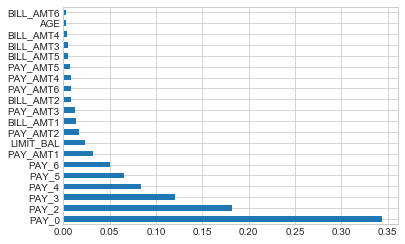

In [0]:
# original
rnd_org = RandomForestClassifier(max_leaf_nodes =20, max_depth=20, n_estimators=200,random_state = 20).fit(X_train, y_train)
feat_importances = pd.Series(rnd_org.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

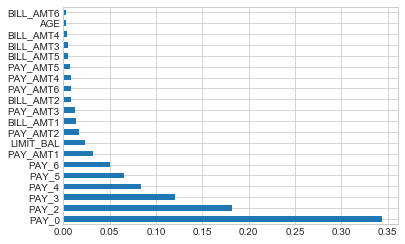

In [0]:
# upsampled 
rnd_up = RandomForestClassifier(max_leaf_nodes =20, max_depth=15, n_estimators=200,random_state = 20).fit(X_train, y_train)
feat_importances = pd.Series(rnd_up.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

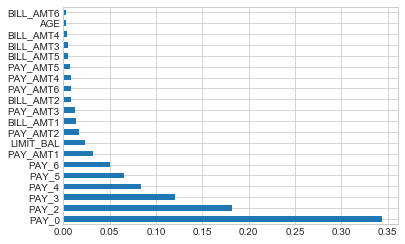

In [0]:
# downsampled
rnd_down = RandomForestClassifier(max_leaf_nodes =20, max_depth=15, n_estimators=200,random_state = 20).fit(X_train, y_train)
feat_importances = pd.Series(rnd_down.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

## 4.4 KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()
param_knn = {'n_neighbors':range(1,10)}

### original dataset

In [0]:
grid_knn_org = GridSearchCV(knn,param_knn, n_jobs= -1)
grid_knn_org.fit(X_train, y_train)
knn_pred_train = grid_knn_org.predict(X_train)
knn_pred_test = grid_knn_org.predict(X_test)

print('Best Parameter:',grid_knn_org.best_params_)
print('Train set score: {:f}'.format(grid_knn_org.score(X_train, y_train)))
print('Test set score: {:f} '.format(grid_knn_org.score(X_test, y_test)))
print('Cross-Validation best score:{:f} '.format(grid_knn_org.best_score_))

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': range(1, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

Best Parameter: {'n_neighbors': 8}
Train set score: 0.798500
Test set score: 0.778667 
Cross-Validation best score:0.770250 


In [0]:
knn_org_train_accuracy = accuracy_score(y_train, knn_pred_train)
knn_org_test_accuracy = accuracy_score(y_test, knn_pred_test)
knn_org_train_recall = recall_score(y_train, knn_pred_train)
knn_org_test_recall = recall_score(y_test, knn_pred_test)
knn_org_train_precision = precision_score(y_train,knn_pred_train)
knn_org_test_precision = precision_score(y_test,knn_pred_test)
knn_org_train_confusion_matrix = confusion_matrix(y_train, knn_pred_train)
knn_org_test_confusion_matrix = confusion_matrix(y_test, knn_pred_test)

print('best score - original', grid_knn_org.best_score_)
print('train accuracy: ', knn_org_train_accuracy)
print('test accuracy: ', knn_org_test_accuracy)
print('train recall',  knn_org_train_recall)
print('test recall: ', knn_org_test_recall)
print('train precision: ', knn_org_train_precision)
print('test precision: ', knn_org_test_precision)
print('train confusion matrix: ',  knn_org_train_confusion_matrix)
print('test confusion matrix: ', knn_org_test_confusion_matrix)

best score - original 0.77025
train accuracy:  0.7985
test accuracy:  0.7786666666666666
train recall 0.16051695073983893
test recall:  0.1040863531225906
train precision:  0.7076796036333609
test precision:  0.4485049833887043
train confusion matrix:  [[18307   354]
 [ 4482   857]]
test confusion matrix:  [[4537  166]
 [1162  135]]


### up-sampled dataset

In [0]:
# upsampled dataset
knn_up = KNeighborsClassifier()
param_knn = {'n_neighbors':range(2,10)}
grid_knn_up = GridSearchCV(knn_up,param_knn, n_jobs= -1)
grid_knn_up.fit(X_train_up, y_train_up)
knn_up_pred_train = grid_knn_up.predict(X_train_up)
knn_up_pred_test = grid_knn_up.predict(X_test)

print('Upsample Best Parameter:',grid_knn_up.best_params_)
print('Upsample Train set score: {:f}'.format(grid_knn_up.score(X_train_up, y_train_up)))
print('Upsample Test set score: {:f} '.format(grid_knn_up.score(X_test, y_test)))
print('Upsample Cross-Validation best score:{:f} '.format(grid_knn_up.best_score_))

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': range(2, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

Upsample Best Parameter: {'n_neighbors': 2}
Upsample Train set score: 0.988184
Upsample Test set score: 0.709000 
Upsample Cross-Validation best score:0.793098 


In [0]:
# results - upsampled training dataset
knn_up_train_accuracy = accuracy_score(y_train_up, knn_up_pred_train)
knn_up_test_accuracy = accuracy_score(y_test, knn_up_pred_test)
knn_up_train_recall = recall_score(y_train_up, knn_up_pred_train)
knn_up_test_recall = recall_score(y_test, knn_up_pred_test)
knn_up_train_precision = precision_score(y_train_up,knn_up_pred_train)
knn_up_test_precision = precision_score(y_test,knn_up_pred_test)
knn_up_train_confusion_matrix = confusion_matrix(y_train_up, knn_up_pred_train)
knn_up_test_confusion_matrix = confusion_matrix(y_test, knn_up_pred_test)

print('Upsample best score:', grid_knn_up.best_score_)
print('Upsample train accuracy: ', knn_up_train_accuracy)
print('Upsample test accuracy: ', knn_up_test_accuracy)
print('Upsample train recall',  knn_up_train_recall)
print('Upsample test recall: ', knn_up_test_recall)
print('Upsample train precision: ', knn_up_train_precision)
print('Upsample test precision: ', knn_up_test_precision)
print('Upsample train confusion matrix: ',  knn_up_train_confusion_matrix)
print('Upsample test confusion matrix: ', knn_up_test_confusion_matrix)

Upsample best score: 0.793097904721076
Upsample train accuracy:  0.9881839129735812
Upsample test accuracy:  0.709
Upsample train recall 0.9766893521247522
Upsample test recall:  0.26985350809560527
Upsample train precision:  0.999670908293111
Upsample test precision:  0.30461270670147955
Upsample train confusion matrix:  [[18655     6]
 [  435 18226]]
Upsample test confusion matrix:  [[3904  799]
 [ 947  350]]


### down-sampled dataset

In [0]:
# downsampled dataset
knn_down = KNeighborsClassifier()
param_knn = {'n_neighbors':range(2,10)}
grid_knn_down = GridSearchCV(knn_down,param_knn, n_jobs= -1)
grid_knn_down.fit(X_train_down, y_train_down)
knn_down_pred_train = grid_knn_down.predict(X_train_down)
knn_down_pred_test = grid_knn_down.predict(X_test)

print('Downsample Best Parameter:',grid_knn_down.best_params_)
print('Downsample Train set score: {:f}'.format(grid_knn_down.score(X_train_down, y_train_down)))
print('Downsample Test set score: {:f} '.format(grid_knn_down.score(X_test, y_test)))
print('Downsample Cross-Validation best score:{:f} '.format(grid_knn_down.best_score_))

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': range(2, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

Downsample Best Parameter: {'n_neighbors': 7}
Downsample Train set score: 0.716239
Downsample Test set score: 0.571333 
Downsample Cross-Validation best score:0.599550 


In [0]:
# results - downsampled training dataset
knn_down_train_accuracy = accuracy_score(y_train_down, knn_down_pred_train)
knn_down_test_accuracy = accuracy_score(y_test, knn_down_pred_test)
knn_down_train_recall = recall_score(y_train_down, knn_down_pred_train)
knn_down_test_recall = recall_score(y_test, knn_down_pred_test)
knn_down_train_precision = precision_score(y_train_down,knn_down_pred_train)
knn_down_test_precision = precision_score(y_test,knn_down_pred_test)
knn_down_train_confusion_matrix = confusion_matrix(y_train_down, knn_down_pred_train)
knn_down_test_confusion_matrix = confusion_matrix(y_test, knn_down_pred_test)

print('Downsample best score: ', grid_knn_down.best_score_)
print('Downsample train accuracy: ', knn_down_train_accuracy)
print('Downsample test accuracy: ', knn_down_test_accuracy)
print('Downsample train recall',  knn_down_train_recall)
print('Downsample test recall: ', knn_down_test_recall)
print('Downsample train precision: ', knn_down_train_precision)
print('Downsample test precision: ', knn_down_test_precision)
print('Downsample train confusion matrix: ',  knn_down_train_confusion_matrix)
print('Downsample test confusion matrix: ', knn_down_test_confusion_matrix)

Downsample best score:  0.5995504776175313
Downsample train accuracy:  0.7162389960666792
Downsample test accuracy:  0.5713333333333334
Downsample train recall 0.7184866079790223
Downsample test recall:  0.6175790285273709
Downsample train precision:  0.7152713033749767
Downsample test precision:  0.278415015641293
Downsample train confusion matrix:  [[3812 1527]
 [1503 3836]]
Downsample test confusion matrix:  [[2627 2076]
 [ 496  801]]


## 4.5 Gradient Boosting Tree

In [0]:
import xgboost as xgb

### original dataset

In [0]:
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)

In [0]:
param = {"objective": "binary:hinge",
         "alpha": 0,
         "lambda": 0.9,
         "n_estimator": 100,
         "booster": "gbtree",
         "eval_metric": "auc",
         "learning_rate": 0.05,
         "max_depth": 15,
         "nthread": 6,
         "max_depth": 15, 
         "eta": 0.08, 
         "subsample": 0.85,
         "colsample_bytree": 0.9} 

watchlist = [(xgb_train, 'xgb_train'), (xgb_test, 'xgb_test')]

xgbm = xgb.train(params = param, 
                 num_boost_round=200,
                 dtrain = xgb_train,
                 early_stopping_rounds = 40,
                 verbose_eval = 10,
                 evals = watchlist)

[0]	xgb_train-auc:0.5	xgb_test-auc:0.5
Multiple eval metrics have been passed: 'xgb_test-auc' will be used for early stopping.

Will train until xgb_test-auc hasn't improved in 40 rounds.
[10]	xgb_train-auc:0.541894	xgb_test-auc:0.529301
[20]	xgb_train-auc:0.900331	xgb_test-auc:0.701672
[30]	xgb_train-auc:0.891298	xgb_test-auc:0.688329
[40]	xgb_train-auc:0.887279	xgb_test-auc:0.675801
[50]	xgb_train-auc:0.89634	xgb_test-auc:0.666521
Stopping. Best iteration:
[19]	xgb_train-auc:0.902385	xgb_test-auc:0.706074



In [0]:
y_pred = xgbm.predict(xgb_test)
print("Recall score for Gradient Boosting with original data: {:5f}".format(recall_score(y_test, y_pred)))
print("Accuracy for Gradient Boosting with original data: {:5f}".format(accuracy_score(y_test, y_pred)))

Recall score for Gradient Boosting with original data: 0.384734
Accuracy for Gradient Boosting with original data: 0.816500


### up-sampled dataset

In [0]:
xgb_train = xgb.DMatrix(X_train_up, label=y_train_up)
xgb_test = xgb.DMatrix(X_test, label=y_test)

In [0]:
param = {"objective": "binary:hinge",
         "alpha": 0,
         "lambda": 0.9,
         "n_estimator": 100,
         "booster": "gbtree",
         "eval_metric": "auc",
         "learning_rate": 0.05,
         "max_depth": 15,
         "nthread": 6,
         "max_depth": 15, 
         "eta": 0.08, 
         "subsample": 0.85,
         "colsample_bytree": 0.9} 

watchlist = [(xgb_train, 'xgb_train'), (xgb_test, 'xgb_test')]

xgbm = xgb.train(params = param, 
                 num_boost_round=300,
                 dtrain = xgb_train,
                 early_stopping_rounds = 50,
                 verbose_eval = 10,
                 evals = watchlist)

[0]	xgb_train-auc:0.5	xgb_test-auc:0.5
Multiple eval metrics have been passed: 'xgb_test-auc' will be used for early stopping.

Will train until xgb_test-auc hasn't improved in 100 rounds.
[10]	xgb_train-auc:0.546059	xgb_test-auc:0.519227
[20]	xgb_train-auc:0.896469	xgb_test-auc:0.682373
[30]	xgb_train-auc:0.949226	xgb_test-auc:0.698686
[40]	xgb_train-auc:0.964096	xgb_test-auc:0.68993
[50]	xgb_train-auc:0.972536	xgb_test-auc:0.683212
[60]	xgb_train-auc:0.979422	xgb_test-auc:0.674304
[70]	xgb_train-auc:0.982986	xgb_test-auc:0.671498
[80]	xgb_train-auc:0.985638	xgb_test-auc:0.66832
[90]	xgb_train-auc:0.988425	xgb_test-auc:0.665554
[100]	xgb_train-auc:0.989926	xgb_test-auc:0.658974
[110]	xgb_train-auc:0.99097	xgb_test-auc:0.658428
[120]	xgb_train-auc:0.992042	xgb_test-auc:0.658468
[130]	xgb_train-auc:0.992846	xgb_test-auc:0.65658
Stopping. Best iteration:
[30]	xgb_train-auc:0.949226	xgb_test-auc:0.698686



In [0]:
y_pred = xgbm.predict(xgb_test)
print("Recall score for Gradient Boosting with original data: {:5f}".format(recall_score(y_test, y_pred)))
print("Accuracy for Gradient Boosting with original data: {:5f}".format(accuracy_score(y_test, y_pred)))

Recall score for Gradient Boosting with original data: 0.396299
Accuracy for Gradient Boosting with original data: 0.804333


### down-sampled dataset

In [0]:
xgb_train = xgb.DMatrix(X_train_down, label=y_train_down)
xgb_test = xgb.DMatrix(X_test, label=y_test)

In [0]:
param = {"objective": "binary:hinge",
         "alpha": 0,
         "lambda": 0.9,
         "n_estimator": 100,
         "booster": "gbtree",
         "eval_metric": "auc",
         "learning_rate": 0.05,
         "max_depth": 15,
         "nthread": 6,
         "max_depth": 15, 
         "eta": 0.08, 
         "subsample": 0.85,
         "colsample_bytree": 0.9} 

watchlist = [(xgb_train, 'xgb_train'), (xgb_test, 'xgb_test')]

xgbm = xgb.train(params = param, 
                 num_boost_round=300,
                 dtrain = xgb_train,
                 early_stopping_rounds = 50,
                 verbose_eval = 10,
                 evals = watchlist)

[0]	xgb_train-auc:0.5	xgb_test-auc:0.5
Multiple eval metrics have been passed: 'xgb_test-auc' will be used for early stopping.

Will train until xgb_test-auc hasn't improved in 50 rounds.
[10]	xgb_train-auc:0.508429	xgb_test-auc:0.500638
[20]	xgb_train-auc:0.913467	xgb_test-auc:0.616921
[30]	xgb_train-auc:0.966005	xgb_test-auc:0.665401
[40]	xgb_train-auc:0.97743	xgb_test-auc:0.686281
[50]	xgb_train-auc:0.983424	xgb_test-auc:0.691168
[60]	xgb_train-auc:0.986795	xgb_test-auc:0.688348
[70]	xgb_train-auc:0.989043	xgb_test-auc:0.693478
[80]	xgb_train-auc:0.990448	xgb_test-auc:0.690195
[90]	xgb_train-auc:0.991478	xgb_test-auc:0.68868
Stopping. Best iteration:
[46]	xgb_train-auc:0.981645	xgb_test-auc:0.694425



In [0]:
y_pred = xgbm.predict(xgb_test)
print("Recall score for Gradient Boosting with down-sampled data: {:5f}".format(recall_score(y_test, y_pred)))
print("Accuracy for Gradient Boosting with down-sampled data: {:5f}".format(accuracy_score(y_test, y_pred)))

Recall score for Gradient Boosting with down-sampled data: 0.703161
Accuracy for Gradient Boosting with down-sampled data: 0.679833


# 5. Model Performance

By conducting various machine learning models on the dataset, we trained several classifiers can be used for predictive analysis. Our next step is to compare the performance of different models and pick top ones to be used under business environment. We compare the prediction accuracy of each model on testing dataset. As we can see, by using original training set,  the accuracy of LR, DT, RF and KNN are around 80%
By using UpSampled dataset, the accuracy of all models are around 70%. And by using downsampled dataset, the accuracy of SVM is much higher than using other two dataset. 

However, detecting potential late payments for the credit account is a special task that we should focus more on how successfully the model can predict to recognize clients with late payment potential. That is why we should pay more attention on Recall rate, instead of accuracy. Obviously, by using downsampled dataset as training set, all models have higher recall rate than using other two datasets. Among all these models, LR, SVM, RF are three classifiers with best performance, which the average recall rate is around 65%. -Meaning that 65% of potential late payment can be detected successfully.

Therefore, we pick these three models to be used for further learning process to improve the performance. On the other hand, we can use model resembling methods such as voting and stacking to enhance the overall performance of the prediction.

# 6. Conclusion

Based on a better prediction model, we have several suggestions for both banks and individual clients.   
- For banks: Keep tracking clients using revolving credits and Push notification of payment remind to those clients who are predicted to be with late payment.   
- For customers: Check your credit card accounts frequently and Check your credit report at least once per year to monitor credit history.




#**7. Reference**



Ismail, S., Amin, H., Shayeri, S. F., & Hashim, N. (2014). Determinants of Attitude towards Credit Card Usage. Jurnal Pengurusan, 41, 145–154. Retrieved from http://search.ebscohost.com.libproxy.utdallas.edu/login.aspx?direct=true&db=bth&AN=99747154&site=ehost-live

Lee, Y.-H., & Huang, Y.-L. (2011). Do you have credit cards? The expansion of the credit card market in Taiwan. Applied Economics Letters, 18(17), 1639–1644. https://doi-org.libproxy.utdallas.edu/10.1080/13504851.2011.556586
